
# Assignment: Random Forest Classification on Glass Dataset


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")


In [2]:

df = pd.read_excel("glass.xlsx", sheet_name="glass")
print("Shape:", df.shape)
df.head()


Shape: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 1. Exploratory Data Analysis (EDA)

##Dataset Info & Missing Values

In [3]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


##Basic Statistics

In [4]:

df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


##Target Class Distribution

In [5]:

target_col = df.columns[-1]
df[target_col].value_counts()


,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


# 2. Data Visualization

##Histograms

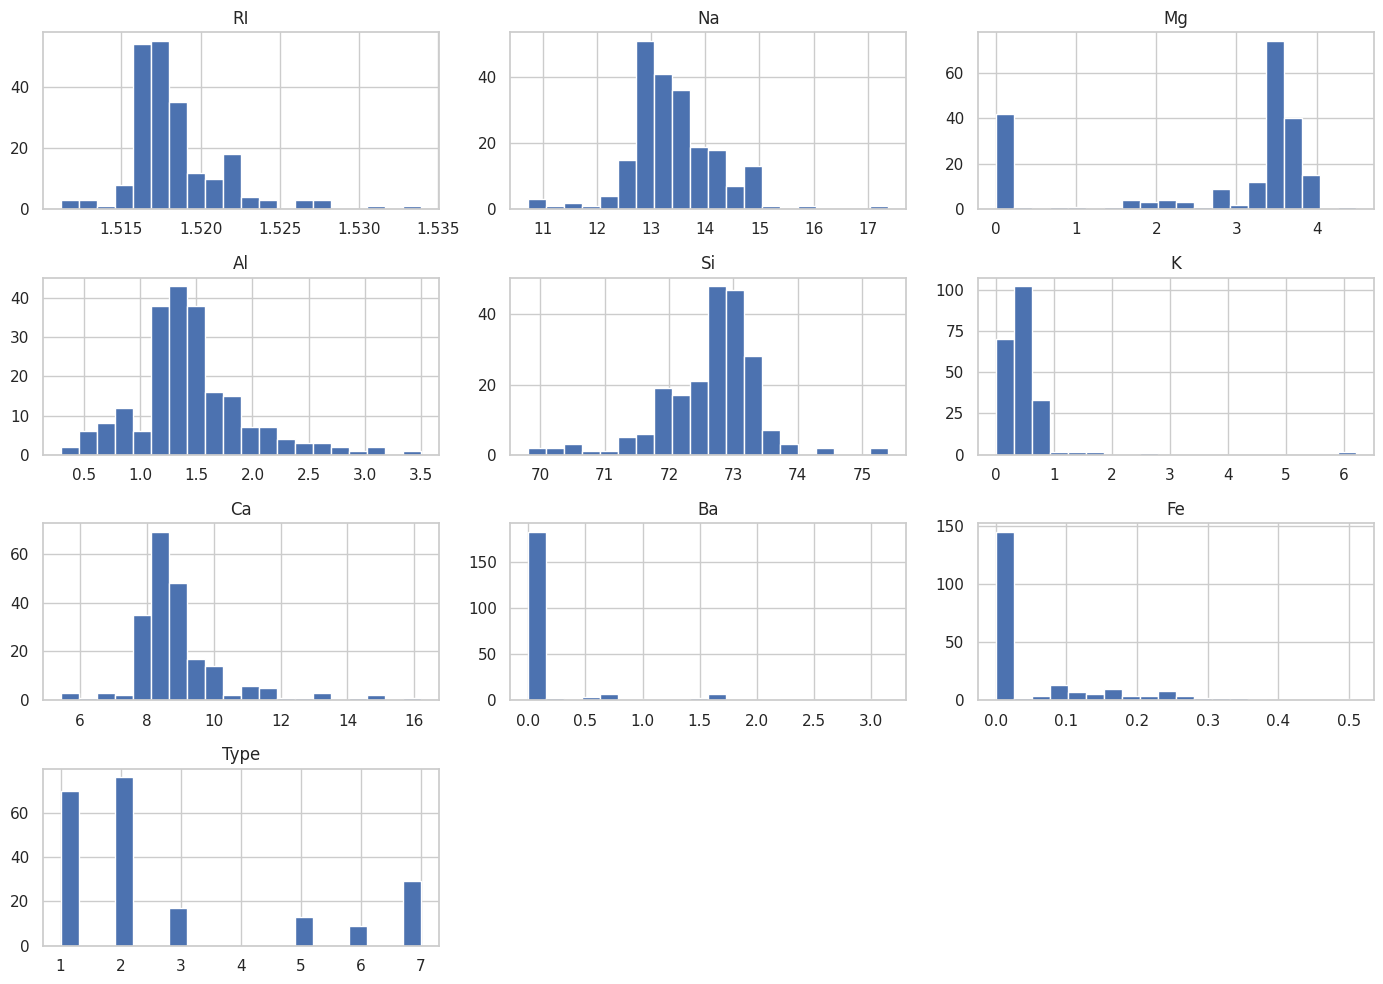

In [6]:

df.hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()


##Boxplots

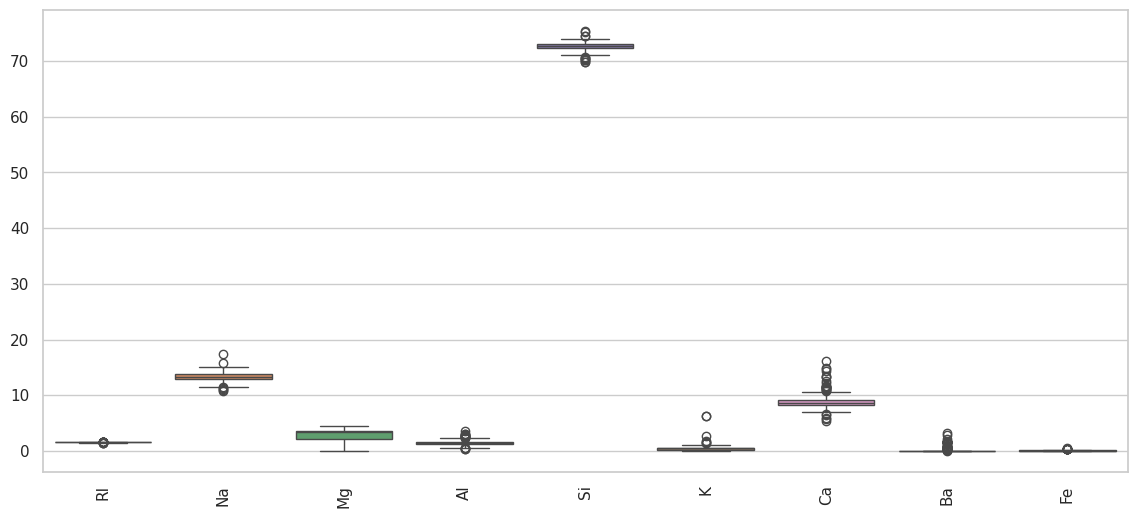

In [7]:

plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop(columns=[target_col]))
plt.xticks(rotation=90)
plt.show()


##Correlation Heatmap

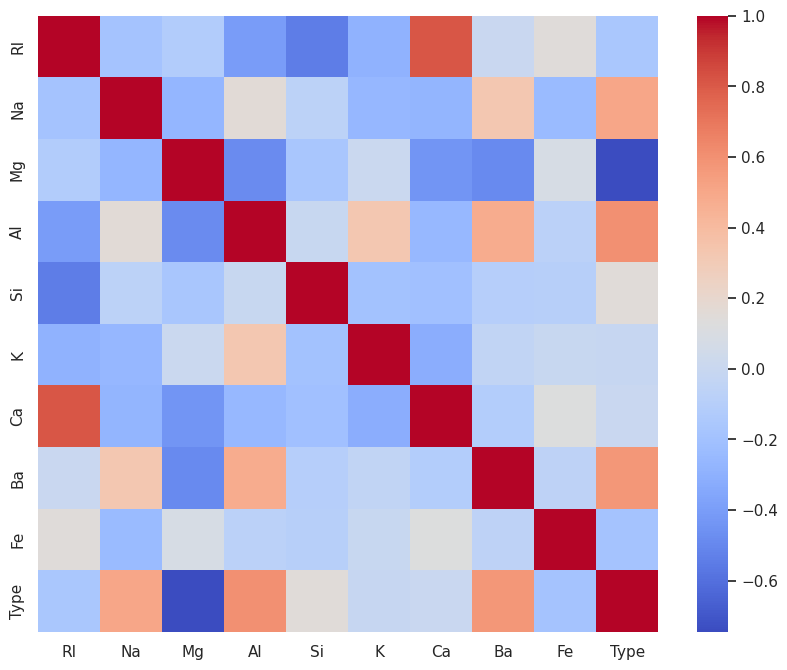

In [8]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.show()


# 3. Data Preprocessing

##Feature & Target Split

In [9]:

X = df.drop(columns=[target_col])
y = df[target_col]


##Feature Scaling

In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Handle Imbalanced Data using SMOTE

In [11]:
#this I learned using internet, not much taught in the class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())


Before SMOTE:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
After SMOTE:
 Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


# 4. Random Forest Model Implementation

##Train-Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


##Random Forest Training & Evaluation

In [13]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.9130434782608695
Precision: 0.9166057727438802
Recall   : 0.9130434782608695
F1-score : 0.913957083958021

Classification Report:

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



# 5. Bagging and Boosting Methods

##Bagging Classifier

In [14]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag.fit(X_train, y_train)

y_bag = bag.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_bag))

Bagging Accuracy: 0.8913043478260869


##AdaBoost Classifier

In [15]:
boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
boost.fit(X_train, y_train)

y_boost = boost.predict(X_test)
print("Boosting Accuracy:", accuracy_score(y_test, y_boost))

Boosting Accuracy: 0.5108695652173914


# 6. Explanations & Insights


### Bagging vs Boosting
- **Bagging (Bootstrap Aggregating):**
  - Trains models independently on random samples
  - Reduces variance
  - Example: Random Forest

- **Boosting:**
  - Trains models sequentially
  - Focuses more on misclassified samples
  - Reduces bias

### Handling Imbalanced Data
- Techniques include:
  - Oversampling (SMOTE)
  - Undersampling
  - Class weights
- SMOTE was used here to balance class distribution.
